In [1]:
import requests as req
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd

In [2]:
html = req.get("https://www.worldometers.info/coronavirus")

In [9]:
print(html.status_code)

200


In [5]:
print(html.content)

200


In [10]:
html_parsed = BeautifulSoup(html.content)

In [11]:
table = html_parsed.find('table', attrs={'id':'main_table_countries_today'})

In [12]:
table

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width

In [13]:
rows = table.find_all('tr')

In [14]:
rows[0]

<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width="30">Active Cases/1M pop</th>
</tr>

In [16]:
rows[0].text.strip()

'#\nCountry,Other\nTotalCases\nNewCases\nTotalDeaths\nNewDeaths\nTotalRecovered\nNewRecovered\nActiveCases\nSerious,Critical\nTot\xa0Cases/1M pop\nDeaths/1M pop\nTotalTests\nTests/\n1M pop\n\nPopulation\nContinent\n1 Caseevery X ppl1 Deathevery X ppl1 Testevery X ppl\nNew Cases/1M pop\nNew Deaths/1M pop\nActive Cases/1M pop'

In [19]:
rows[9].text.strip().split('\n')

['1',
 'USA',
 '111,820,082',
 '',
 '1,219,487                                ',
 '',
 '109,814,428',
 '',
 '786,167',
 '940',
 '333,985',
 '3,642',
 '1,186,851,502',
 '3,544,901',
 '334,805,269 ',
 'North America',
 '',
 '32750',
 '',
 '',
 '2,348']

In [21]:
data = []
for x in rows:
    data.append(x.text.strip().split('\n')[1:5])

In [22]:
df = pd.DataFrame(data)

In [23]:
df.head()

,0,1,2,3
0,"Country,Other",TotalCases,NewCases,TotalDeaths
1,,"131,889,132",,"1,695,941"
2,,"221,500,265",,"1,553,662"
3,,"253,406,198",,"2,101,824"
4,,"70,200,879",,"1,367,332"


In [24]:
df = pd.DataFrame(data[9:], columns = data[0])

In [25]:
df.head()

,"Country,Other",TotalCases,NewCases,TotalDeaths
0,USA,"111,820,082",,"1,219,487"
1,India,"45,035,393",,"533,570"
2,France,"40,138,560",,"167,642"
3,Germany,"38,828,995",,"183,027"
4,Brazil,"38,743,918",,"711,380"


In [28]:
df.to_csv('covid_19_data.csv')

In [31]:
df_plot = df[['Country,Other', 'TotalCases']]
df_plot = df_plot[:10]

In [32]:
df_plot.head()

,"Country,Other",TotalCases
0,USA,"111,820,082"
1,India,"45,035,393"
2,France,"40,138,560"
3,Germany,"38,828,995"
4,Brazil,"38,743,918"


In [33]:
df_plot['TotalCases'] = df_plot['TotalCases'].apply(lambda x: x.replace(',',''))

In [34]:
df_plot.head()

,"Country,Other",TotalCases
0,USA,111820082
1,India,45035393
2,France,40138560
3,Germany,38828995
4,Brazil,38743918


In [39]:
# Convert 'TotalCases' to numeric
df_plot['TotalCases'] = pd.to_numeric(df_plot['TotalCases'])

<Axes: xlabel='Country,Other'>

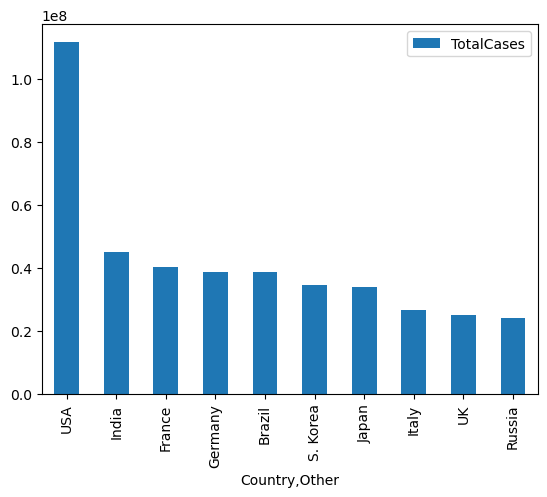

In [40]:
df_plot.plot(kind= 'bar', x ='Country,Other', y = 'TotalCases')